In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')

In [3]:
# Display all columns
pd.set_option('display.max_columns', None)

In [4]:
# Basic investigation
print("--- First 5 rows ---")
print(df.head())

print("\n--- Dataset Info ---")
df.info()

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicated Rows ---")
print(df.duplicated().sum())

--- First 5 rows ---
   Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0           0                     68.95   35  432837300.0   
1           1                     80.23   31  479092950.0   
2           2                     69.47   26  418501580.0   
3           3                     74.15   29  383643260.0   
4           4                     68.37   35  517229930.0   

   Daily Internet Usage       Male        Timestamp Clicked on Ad  \
0                256.09  Perempuan   3/27/2016 0:53            No   
1                193.77  Laki-Laki    4/4/2016 1:39            No   
2                236.50  Perempuan  3/13/2016 20:35            No   
3                245.89  Laki-Laki   1/10/2016 2:31            No   
4                225.58  Perempuan    6/3/2016 3:36            No   

            city                       province    category  
0  Jakarta Timur  Daerah Khusus Ibukota Jakarta   Furniture  
1       Denpasar                           Bali        Food  
2       Sur

In [5]:
# Print distinct values
print("\nDistinct Values for Each Column:")
for col in df.columns:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values[:20]}{'...' if len(unique_values) > 20 else ''} (Total: {len(unique_values)})")


Distinct Values for Each Column:
Unnamed: 0: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]... (Total: 1000)
Daily Time Spent on Site: [68.95 80.23 69.47 74.15 68.37 59.99 88.91 66.   74.53 69.88 47.64 83.07
 69.57 79.52 42.95 63.45 55.39 82.03 54.7  74.58]... (Total: 891)
Age: [35 31 26 29 23 33 48 30 20 49 37 24 41 36 40 52 28 34 22 57]... (Total: 43)
Area Income: [4.3283730e+08 4.7909295e+08 4.1850158e+08 3.8364326e+08 5.1722993e+08
 4.1833092e+08 3.7696995e+08 1.7215331e+08 4.8203400e+08 3.8949624e+08
 3.1942757e+08 4.3743707e+08 3.6145844e+08 3.6217741e+08 2.1683200e+08
 3.6527561e+08 1.6755802e+08 5.0057756e+08 2.1761278e+08 1.6675204e+08]... (Total: 988)
Daily Internet Usage: [256.09 193.77 236.5  245.89 225.58 226.74 208.36 131.76 221.51 183.82
 122.02 230.87 113.12 214.23 143.56 140.64 129.41 187.53    nan 135.51]... (Total: 956)
Male: ['Perempuan' 'Laki-Laki' nan] (Total: 3)
Timestamp: ['3/27/2016 0:53' '4/4/2016 1:39' '3/13/2016 20:35' '1/10/2016 2:31'
 '6/3/

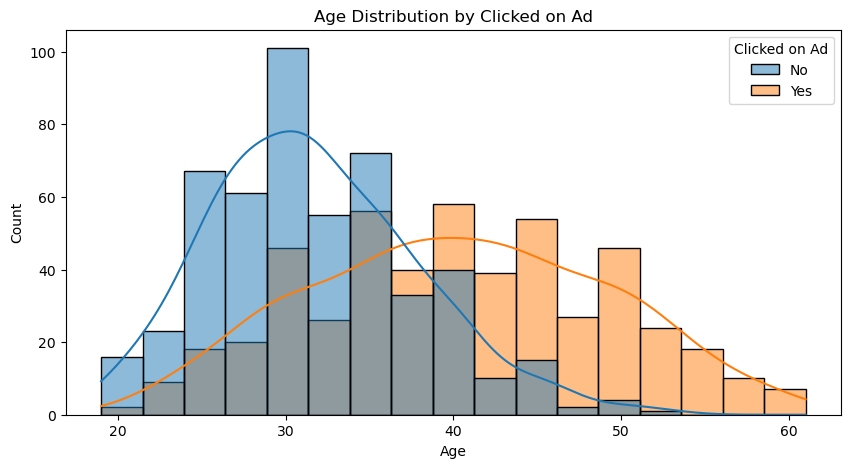

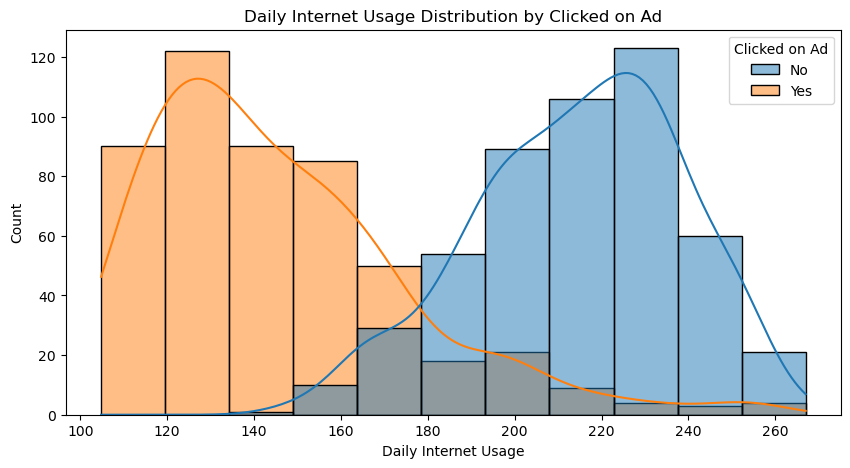

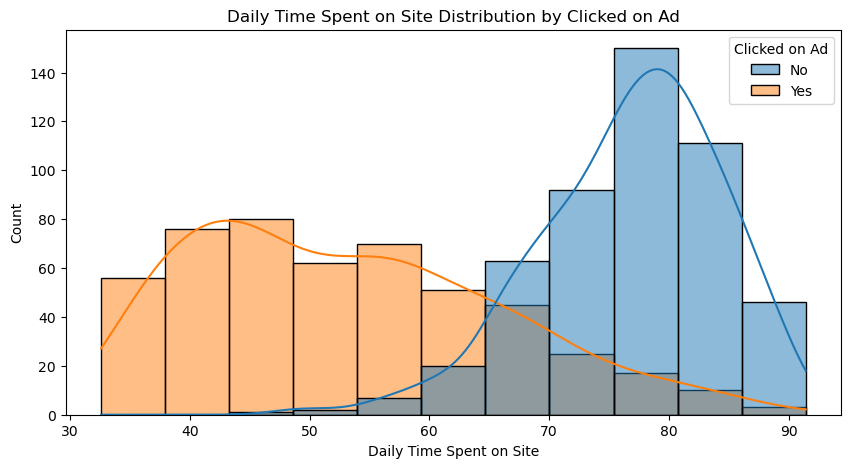

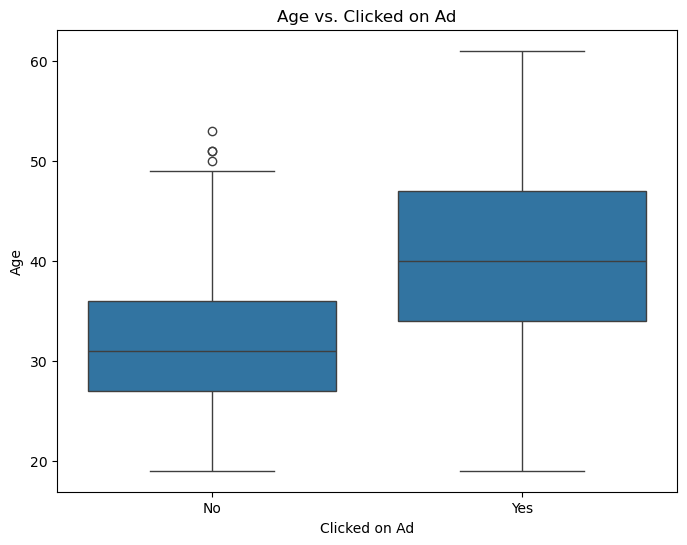

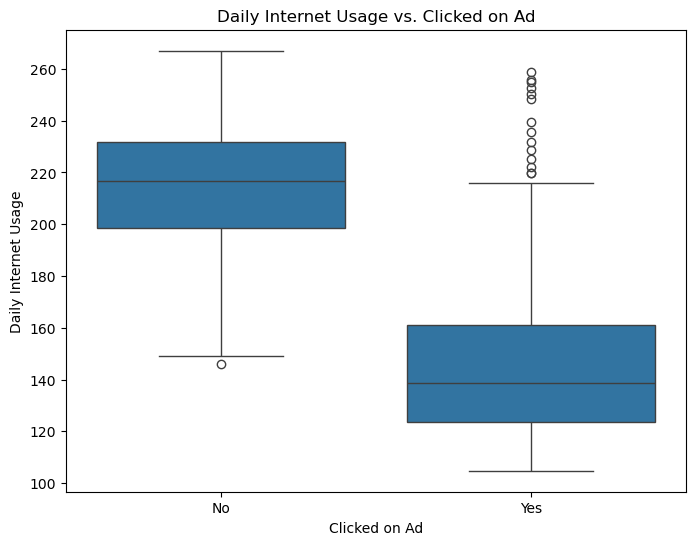

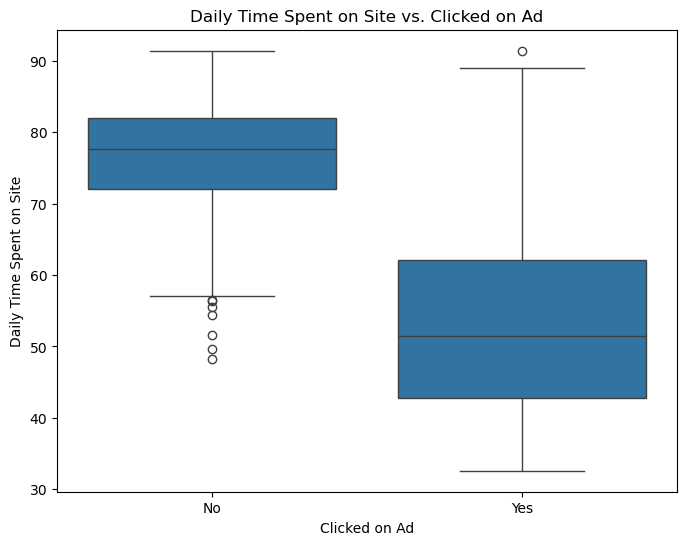

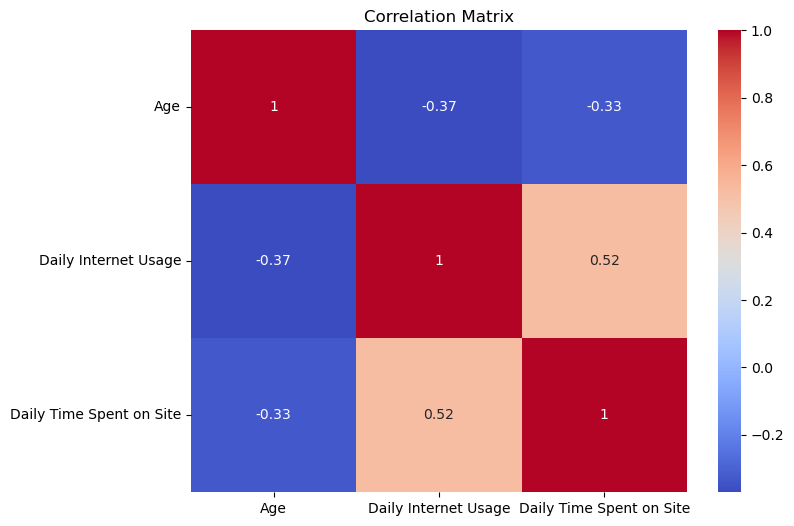

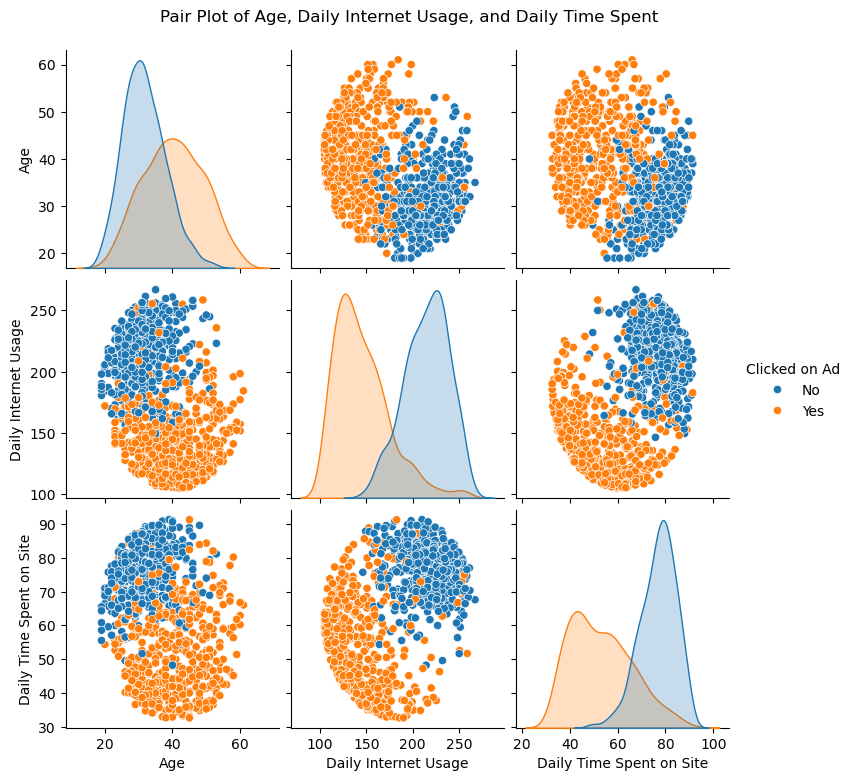

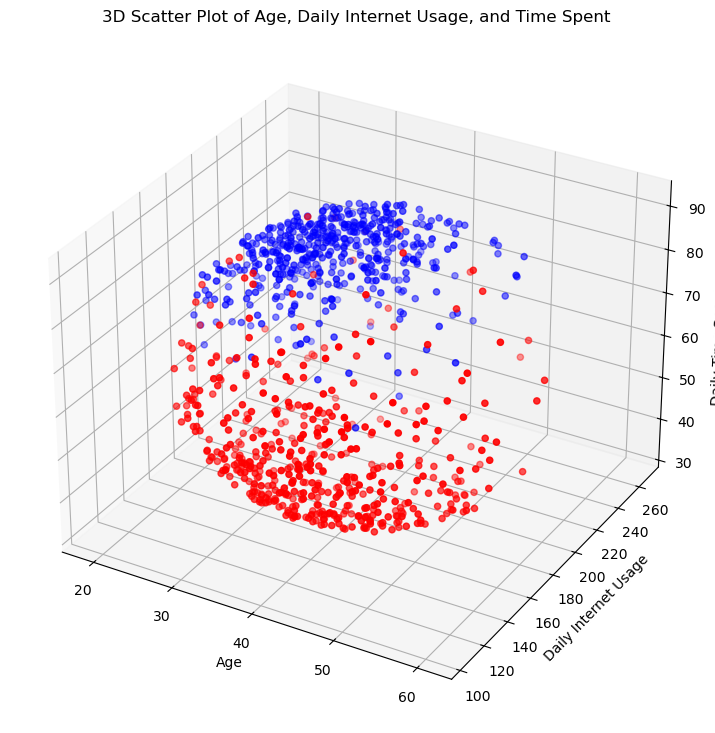

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# --- Univariate Analysis ---
# 1. Age
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Clicked on Ad', kde=True)
plt.title('Age Distribution by Clicked on Ad')
plt.show()

# 2. Daily Internet Usage
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Daily Internet Usage', hue='Clicked on Ad', kde=True)
plt.title('Daily Internet Usage Distribution by Clicked on Ad')
plt.show()

# 3. Daily Time Spent on Site
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Daily Time Spent on Site', hue='Clicked on Ad', kde=True)
plt.title('Daily Time Spent on Site Distribution by Clicked on Ad')
plt.show()

# --- Bivariate Analysis ---
# 1. Age vs. Clicked on Ad
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Clicked on Ad', y='Age')
plt.title('Age vs. Clicked on Ad')
plt.show()

# 2. Daily Internet Usage vs. Clicked on Ad
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Clicked on Ad', y='Daily Internet Usage')
plt.title('Daily Internet Usage vs. Clicked on Ad')
plt.show()

# 3. Daily Time Spent on Site vs. Clicked on Ad
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Clicked on Ad', y='Daily Time Spent on Site')
plt.title('Daily Time Spent on Site vs. Clicked on Ad')
plt.show()

# --- Correlation and Multivariate Analysis ---
# Correlation Matrix
correlation_matrix = df[['Age', 'Daily Internet Usage', 'Daily Time Spent on Site']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pair Plot
sns.pairplot(df, vars=['Age', 'Daily Internet Usage', 'Daily Time Spent on Site'], hue='Clicked on Ad')
plt.title('Pair Plot of Age, Daily Internet Usage, and Daily Time Spent', y=3.2, x=-0.5)
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

# Map 'Clicked on Ad' to colors
colors = {'Yes': 'red', 'No': 'blue'}
ax.scatter(df['Age'], df['Daily Internet Usage'], df['Daily Time Spent on Site'],
           c=df['Clicked on Ad'].map(colors))

ax.set_xlabel('Age')
ax.set_ylabel('Daily Internet Usage')
ax.set_zlabel('Daily Time Spent on Site')
ax.set_title('3D Scatter Plot of Age, Daily Internet Usage, and Time Spent')
plt.show()